# 과제 설명
1. matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
2. 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
3. 시각화 결과를 해석하고  3가지의 인사이트 도출하기 

# import

## 한글폰트 깨짐방지

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드부터 다시 실행해야 함 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid") # choose a style for seaborn figure

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기

In [4]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/ABChaeeun/mining/main/assignment_vis/data/health_data.csv')
raw_data

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


# 전처리

In [5]:
data = pd.DataFrame()

data.insert(0, '가입자일련번호', raw_data['가입자일련번호'])

data.insert(1, '성별', raw_data['성별코드'])
data['성별'].replace(['M','F'], ['남','여'], inplace=True)

data.insert(2, '연령대', raw_data['연령대코드(5세단위)'])

data.insert(3, '신장 (5Cm단위)', raw_data['신장(5Cm단위)'])

data.insert(4, '체중 (5Kg 단위)', raw_data['체중(5Kg 단위)'])

data.insert(5, '흡연상태', raw_data['흡연상태']) # No / Yes / NotNow
data['흡연상태'] = data['흡연상태'].replace(['No','Yes','NotNow'], ['비흡연자','흡연자','현재는 비흡연자'])

data.insert(6, '충치유무', raw_data['치아우식증유무'])
data['충치유무'] = data['충치유무'].replace([0, 1], ['없음', '있음'])

data.insert(7, '치석유무', raw_data['치석'])
data['치석유무'] = data['치석유무'].replace([0, 1, 2], ['없음', '있음', '측정불가'])

data.insert(8, '혈색소', raw_data['혈색소'])

# 인덱스 설정
data.set_index(data['가입자일련번호'], inplace=True)
data.drop(['가입자일련번호'], axis=1, inplace=True)

In [6]:
# 연령대코드 추가 전처리

def age_categorize(age):

  if age == 1 or age == 2:
    age = '0'
  elif age == 3 or age == 4:
    age = '10'
  elif age == 5 or age == 6:
    age = '20'
  elif age == 7 or age == 8:
    age = '30'
  elif age == 9 or age == 10:
    age = '40'
  elif age == 11 or age == 12:
    age = '50'
  elif age == 13 or age == 14:
    age = '60'
  elif age == 15 or age == 16:
    age = '70'
  elif age == 17 or age == 18:
    age = '80'
  
  return age


age_category = data.연령대.apply(age_categorize)
data.insert(2, '연령대 (10대단위)', age_category)
data['연령대 (10대단위)'] = data['연령대 (10대단위)'].astype('int64')
data.drop(['연령대'], axis=1, inplace=True)

data

,성별,연령대 (10대단위),신장 (5Cm단위),체중 (5Kg 단위),흡연상태,충치유무,치석유무,혈색소
가입자일련번호,,,,,,,,
1,남,40,165,60,비흡연자,NaN,NaN,15.0
2,여,60,150,65,비흡연자,NaN,NaN,12.7
3,여,50,155,55,비흡연자,NaN,NaN,12.8
4,남,60,160,70,비흡연자,없음,없음,16.4
5,여,50,155,50,비흡연자,NaN,NaN,12.4
...,...,...,...,...,...,...,...,...
9996,여,60,155,55,비흡연자,NaN,NaN,13.7
9997,여,50,160,55,비흡연자,없음,없음,14.3
9998,남,50,160,80,비흡연자,NaN,NaN,15.6


# 0. 데이터 분포 시각화

([<matplotlib.patches.Wedge at 0x7f3fcb65dd50>,
 [Text(-1.0739920327689187, 0.2377837537530393, '남자'),
  Text(1.0739920105059924, -0.2377838543074293, '여자')],
 [Text(-0.5858138360557738, 0.12970022931983963, '51.4%'),
  Text(0.5858138239123594, -0.1297002841676887, '48.6%')])

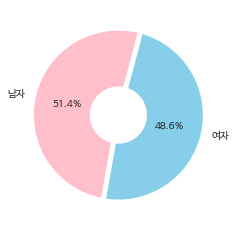

In [7]:
# 남녀 비율
ratio = [data.성별[data['성별']=='남'].count(), data.성별[data['성별']=='여'].count()]
labels = ['남자', '여자']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors={'pink', 'skyblue'})

# 1. 키와 체중의 관계
`인사이트`

x축은 신장, y축은 체중으로 놓고 산점도를 그려보았다.

키가 클 수록 체중도 증가하는 것을 볼 수 있었다.

따라서 키와 체중은 서로 양의 상관관계가 있음을 볼 수 있다.

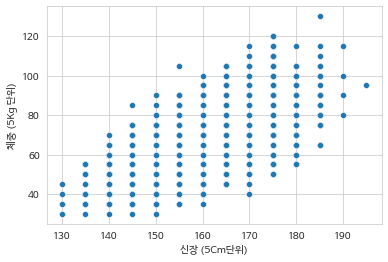

In [8]:
sns.scatterplot(data = data, x = '신장 (5Cm단위)', y = '체중 (5Kg 단위)')

# 2. 흡연상태와 치아의 관계
`인사이트`

흡연 상태를 기준으로 countplot을 그린 후 그 안에서의 충치와 치석 유무 비율을 보았다.

흡연을 하지 않는 사람들과 흡연을 하는 사람들을 비교 해 보았을 떄, 흡연을 하지 않는 사람들 중 충치와 치석이 없는 사람들이 훨씬 많은 것을 볼 수 있었다.

심지어 흡연자들 중 치석이 없는 사람은 거의 없었다.

따라서 비흡연자일수록 충치와 치석의 비율이 낮은 것을 알 수 있다.

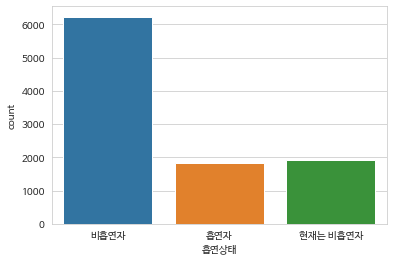

In [9]:
sns.countplot(data = data, x = '흡연상태')

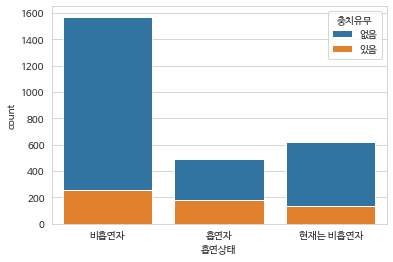

In [10]:
sns.countplot(data = data, x = '흡연상태', hue='충치유무', dodge=False)

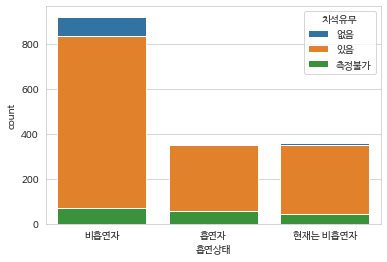

In [11]:
sns.countplot(data = data, x = '흡연상태', hue='치석유무', dodge=False)

# 3. 연령대와 혈색소의 관계
`인사이트`

x축은 연령대, y축은 혈색소로 데이터의 분포를 살펴보았다.

연령대가 높아질수록 혈색소가 낮아지는 것을 볼 수 있다.

따라서 연령대와 혈색소는 서로 음의 상관관계가 있음을 볼 수 있다.

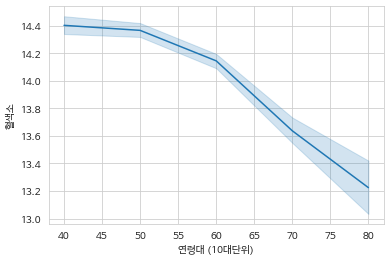

In [12]:
sns.lineplot(data = data, x = '연령대 (10대단위)', y = '혈색소')